In [3]:
class Student:
    def __init__(self, name: str, age: int):
        self.name = name
        self.__age = age  # По заданию

    @property
    def age(self) -> int:
        return self.__age  # дополнительно

    @age.setter
    def age(self, age: int):
        print('Проверка началась')
        if age < 0:
            raise ValueError("Возраст не может быть отрицательным.")
        self.__age = age  # дополнительно
        print('Проверка закончилась')


student = Student("Anna", 20)
print(student.age)
student.age = 25
print(student.age)
# student.age = -5

20
Проверка началась
Проверка закончилась
25


Факультативно
[Аналог пандаса](https://github.com/pola-rs/polars)
[Документация PANDAS](https://pandas.pydata.org/)

### Series

In [4]:
# Одномерный массив, который может содержать данные любого типа (целые числа, строки, числа с плавающей запятой и т. д.)
# Создание series

# из списка
import pandas as pd

my_list = [11, 2, 3, 4, 5]
s_list = pd.Series(my_list)

In [5]:
print(s_list)

0    11
1     2
2     3
3     4
4     5
dtype: int64


In [12]:
import numpy as np

In [13]:
array = np.array([11, 2, 3, 4, 5])
s_numpy = pd.Series(array)
s_numpy

0    11
1     2
2     3
3     4
4     5
dtype: int64

In [8]:
my_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
s_dict = pd.Series(my_dict)
s_dict

a    1
b    2
c    3
d    4
dtype: int64

In [9]:
s_indxed = pd.Series([10, 20, 30], index=['x', 'y', 'z'])
s_indxed

x    10
y    20
z    30
dtype: int64

In [14]:
dates = pd.date_range('2024-01-01', periods=5)
s_dates = pd.Series(np.random.randn(5), index=dates)
s_dates

2024-01-01   -0.933742
2024-01-02   -0.646954
2024-01-03   -1.452526
2024-01-04    1.759219
2024-01-05    1.981139
Freq: D, dtype: float64

In [17]:
data = {
    'Name': ['Alice', 'Alex', 'Dan'],
    'Age': [25, 30, 17],
}
df = pd.DataFrame(data)

s_from_df = df['Age']
s_from_df

0    25
1    30
2    17
Name: Age, dtype: int64

### DataFrame

In [18]:
"""
Двумерная таблица данных, аналогичная таблице в базе данных или электронной таблице (например, в Excel).
DataFrame состоит из строк и столбцов, где каждый столбец может содержать данные разного типа (числа, строки и т. д.)
"""
# Создание dataframe
data = {
    'Name': ['Alice', 'Alex', 'Dan'],
    'Age': [25, 30, 17],
}
df = pd.DataFrame(data)
df

,Name,Age
0,Alice,25
1,Alex,30
2,Dan,17


In [21]:
array = np.array([[1, 'Alice', 25], [2, 'Alex', 30], [3, 'Dan', 17]])
df_numpy = pd.DataFrame(array, columns=['ID', 'Name', 'Age'])
df_numpy

,ID,Name,Age
0,1,Alice,25
1,2,Alex,30
2,3,Dan,17


In [22]:
df_csv = pd.read_csv('data.csv')
df_csv

,Имя,Возраст,Город
0,Алекс,25,Москва
1,Света,30,Санкт-Петербург
2,Коля,22,Казань


In [27]:
data = {
    'Name': ['Alice', 'Alex', 'Dan'],
    'Age': [25, 30, 17],
}
df_indxed = pd.DataFrame(data, index=['a', 'b', 'c'])

In [24]:
df_indxed

,Name,Age
a,Alice,25
b,Alex,30
c,Dan,17


In [29]:
dates = pd.date_range('2024-01-01', periods=3)
date_time = {
    'Date': dates,
    'Temp': [5, 6, 2.9],
}
df_time = pd.DataFrame(date_time)
df_time

,Date,Temp
0,2024-01-01,5.0
1,2024-01-02,6.0
2,2024-01-03,2.9


### Операции с DF

In [37]:
data = {
    'Имя': ['Алекс', 'Света', 'Коля', 'Мария', 'Петр'],
    'Возраст': [25, 30, 22, 28, 35],
    'Город': ['Москва', 'Санкт-Петербург', 'Казань', 'Екатеринбург', 'Нижний Новгород']
}
df = pd.DataFrame(data)
df.head(3)

df.tail(2)

,Имя,Возраст,Город
3,Мария,28,Екатеринбург
4,Петр,35,Нижний Новгород


In [43]:
df['Имя']
df[['Имя', 'Возраст']]

,Имя,Возраст
0,Алекс,25
1,Света,30
2,Коля,22
3,Мария,28
4,Петр,35


In [44]:
df.iloc[1]

Имя                  Света
Возраст                 30
Город      Санкт-Петербург
Name: 1, dtype: object

In [45]:
df.iloc[[0, 2]]

,Имя,Возраст,Город
0,Алекс,25,Москва
2,Коля,22,Казань


In [46]:
df[df['Возраст'] > 25]

,Имя,Возраст,Город
1,Света,30,Санкт-Петербург
3,Мария,28,Екатеринбург
4,Петр,35,Нижний Новгород


In [47]:
df['Старший'] = df['Возраст'] > 30
df

,Имя,Возраст,Город,Старший
0,Алекс,25,Москва,False
1,Света,30,Санкт-Петербург,False
2,Коля,22,Казань,False
3,Мария,28,Екатеринбург,False
4,Петр,35,Нижний Новгород,True


In [51]:
a = df.drop('Старший', axis=1)
df.drop('Старший', axis=1, inplace=True)
df

KeyError: "['Старший'] not found in axis"

In [52]:
grouped = df.groupby('Город')['Возраст'].mean()
grouped

Город
Екатеринбург       28.0
Казань             22.0
Москва             25.0
Нижний Новгород    35.0
Санкт-Петербург    30.0
Name: Возраст, dtype: float64

In [53]:
sorted_df = df.sort_values(by='Возраст')
sorted_df

,Имя,Возраст,Город
2,Коля,22,Казань
0,Алекс,25,Москва
3,Мария,28,Екатеринбург
1,Света,30,Санкт-Петербург
4,Петр,35,Нижний Новгород


###  Обработка отсутствующих значений

In [54]:
data_with_nan = {
    'Имя': ['Алекс', None, 'Коля', 'Мария', None],
    'Возраст': [25, 30, None, 28, 35]
}
df_nan = pd.DataFrame(data_with_nan)

In [56]:
df_nan

,Имя,Возраст
0,Алекс,25.0
1,None,30.0
2,Коля,NaN
3,Мария,28.0
4,None,35.0


In [61]:
df = df_nan.fillna({'Имя': 'Неизвестно', 'Возраст': df_nan['Возраст'].mean()})
df_nan.fillna({'Имя': 'Неизвестно', 'Возраст': df_nan['Возраст'].mean()}, inplace=True)
df_nan

,Имя,Возраст
0,Алекс,25.0
1,Неизвестно,30.0
2,Коля,29.5
3,Мария,28.0
4,Неизвестно,35.0


In [66]:
data_with_nan = {
    'Имя': ['Алекс', None, 'Коля', 'Мария', None],
    'Возраст': [25, 30, np.nan, 28, 35],
    'Город': ['Москва', 'Санкт-Петербург', None, 'Екатеринбург', 'Нижний Новгород']
}
df_nan = pd.DataFrame(data_with_nan)
df_nan

,Имя,Возраст,Город
0,Алекс,25.0,Москва
1,None,30.0,Санкт-Петербург
2,Коля,NaN,None
3,Мария,28.0,Екатеринбург
4,None,35.0,Нижний Новгород


In [65]:
df_nan.isnull()

,Имя,Возраст,Город
0,False,False,False
1,True,False,False
2,False,True,True
3,False,False,False
4,True,False,False


In [67]:
df_nan.isnull().sum()

Имя        2
Возраст    1
Город      1
dtype: int64

In [70]:
df_droped = df_nan.dropna()
df_droped

,Имя,Возраст,Город
0,Алекс,25.0,Москва
3,Мария,28.0,Екатеринбург


In [71]:
df_nan

,Имя,Возраст,Город
0,Алекс,25.0,Москва
1,None,30.0,Санкт-Петербург
2,Коля,NaN,None
3,Мария,28.0,Екатеринбург
4,None,35.0,Нижний Новгород


In [72]:
df_nan.at[1, 'Имя'] = 'Света'
df_nan

,Имя,Возраст,Город
0,Алекс,25.0,Москва
1,Света,30.0,Санкт-Петербург
2,Коля,NaN,None
3,Мария,28.0,Екатеринбург
4,None,35.0,Нижний Новгород


In [73]:
df_nan['Город'].replace({'Санкт-Петербург': 'Питер'}, inplace=True)
df_nan

/var/folders/64/5d1d86ts6r7_c93jjw7kgz_00000gn/T/ipykernel_16593/9790921.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nan['Город'].replace({'Санкт-Петербург': 'Питер'}, inplace=True)


,Имя,Возраст,Город
0,Алекс,25.0,Москва
1,Света,30.0,Питер
2,Коля,NaN,None
3,Мария,28.0,Екатеринбург
4,None,35.0,Нижний Новгород


### Визуализация данных

In [74]:
pip install matplotlib seaborn

  Using cached matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.1 kB)
Using cached matplotlib-3.9.2-cp311-cp311-macosx_11_0_arm64.whl (7.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.4 MB/s eta 0:00:001.5 MB/s eta 0:00:01
Using cached contourpy-1.3.0-cp311-cp311-macosx_11_0_arm64.whl (250 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp311-cp311-macosx_11_0_arm64.whl (2.3 MB)
Using cached kiwisolver-1.4.7-cp311-cp311-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-11.0.0-cp311-cp311-macosx_11_0_arm64.whl (3.0 MB)
   ━━━━━

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data = {
    'Имя': ['Алекс', 'Света', 'Коля', 'Мария', 'Петр'],
    'Возраст': [25, 30, 22, 28, 35],
    'Город': ['Москва', 'Санкт-Петербург', 'Казань', 'Екатеринбург', 'Нижний Новгород']
}
df = pd.DataFrame(data)

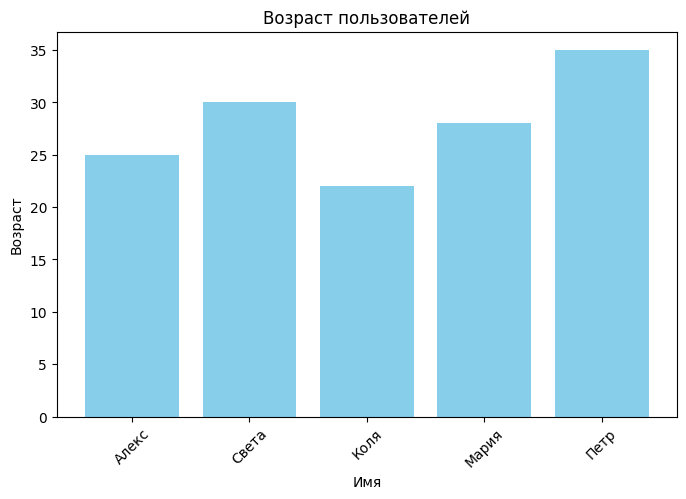

In [82]:
plt.figure(figsize=(8, 5))
plt.bar(df['Имя'], df['Возраст'], color='skyblue')
plt.title('Возраст пользователей')
plt.xlabel('Имя')
plt.ylabel('Возраст')
plt.xticks(rotation=45)
plt.show()

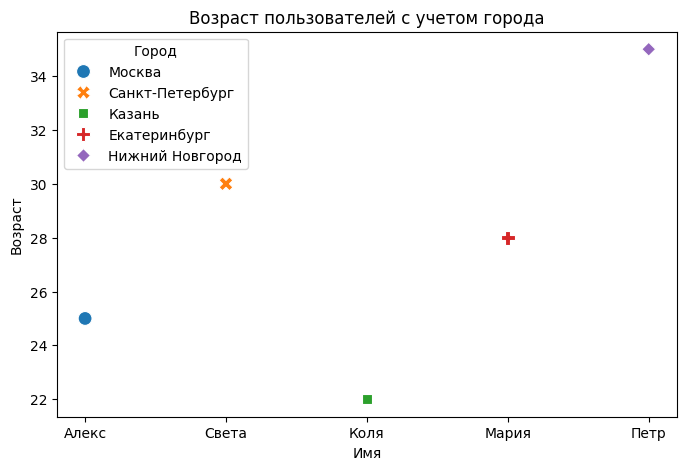

In [84]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Имя', y='Возраст', data=df, hue='Город', style='Город', s=100)
plt.title('Возраст пользователей с учетом города')
plt.show()

# Домашнее задание 3

1. Загрузить данные из файла csv
2. Сделать:
   - Отфильтровать по заданному условию (на свой выбор);
   - Добавить новый столбец, с вычисляемыми значениями;
   - Заполнить пропущенные значения;
   - Построить график с использованием Pandas DF в основе
3. Написать краткое описание того, что было сделано и какие выводы можно сделать из данных.